# Librerias compartidas

In [14]:
import cv2
import numpy as np

# Problema 1
Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes puntos: <br> <br>
Si el parametro color vale 1, la imagen debe mostrar activos ´unicamente el color azul. <br>
Si el parametro color vale 2, la imagen debe mostrar activos ´unicamente el color verde. <br>
Si el parametro color vale 3, la imagen debe mostrar activos ´unicamente el color rojo. <br>
Si el parametro color vale 10, la imagen debe mostrar activos ´unicamente los colores rojo y verde.  <br>
Si el parametro color vale 20, la imagen debe mostrar activos ´unicamente los colores verde y azul.  <br>
Si el par´ametro color vale 30, la imagen debe mostrar activos ´unicamente los colores azul y rojo. <br>

In [15]:
def activar_canales(imagen, color):
    imagen_modificada = np.zeros_like(imagen)
    
    if color == 1:
        imagen_modificada[:, :, 0] = imagen[:, :, 0]
    elif color == 2: 
        imagen_modificada[:, :, 1] = imagen[:, :, 1]
    elif color == 3: 
        imagen_modificada[:, :, 2] = imagen[:, :, 2]
    elif color == 10:  
        imagen_modificada[:, :, 1] = imagen[:, :, 1]
        imagen_modificada[:, :, 2] = imagen[:, :, 2]
    elif color == 20:
        imagen_modificada[:, :, 0] = imagen[:, :, 0]
        imagen_modificada[:, :, 1] = imagen[:, :, 1]
    elif color == 30:  
        imagen_modificada[:, :, 0] = imagen[:, :, 0]
        imagen_modificada[:, :, 2] = imagen[:, :, 2]
    else:
        raise ValueError("El valor de color debe ser 1, 2, 3, 10, 20 o 30")
    
    return imagen_modificada


In [16]:
imagen = cv2.imread('img.jpg')
color = 3
imagen_resultante = activar_canales(imagen, color)

cv2.imshow('Imagen Resultante', imagen_resultante)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Problema 2
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1,imagen2, perro) estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 im´agenes se construya la imagen original a color.

In [18]:
def reconstruir_imagen_color(carpeta, imagenes):
    # Leer las imágenes en escala de grises desde sus respectivas carpetas
    img1 = cv2.imread(f'{carpeta}/{imagenes[0]}.jpg', cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(f'{carpeta}/{imagenes[1]}.jpg', cv2.IMREAD_GRAYSCALE)
    img3 = cv2.imread(f'{carpeta}/{imagenes[2]}.jpg', cv2.IMREAD_GRAYSCALE)        
   
    imagen_color = np.zeros((img1.shape[0], img1.shape[1], 3), dtype=np.uint8)
    
    imagen_color[:, :, 0] = img1  # Canal azul
    imagen_color[:, :, 1] = img2  # Canal verde
    imagen_color[:, :, 2] = img3  # Canal rojo
    
    return imagen_color

In [26]:
inputs = [
    {
    'carpeta': 'perro',
    'imagenes': ['perro_salida_gray_azul','perro_salida_gray_verde','perro_salida_gray_rojo']
    },
     {
    'carpeta': 'imagen1',
    'imagenes': ['imagen1_salida_gray_azul','imagen1_salida_gray_verde','imagen1_salida_gray_rojo']
    },
     {
    'carpeta': 'imagen2',
    'imagenes': ['imagen2_salida_gray_azul','imagen2_salida_gray_verde','imagen2_salida_gray_rojo']
    }
]

for record in inputs:
    imagen_color = reconstruir_imagen_color(record['carpeta'], record['imagenes'])
    cv2.imshow('Imagen Color', imagen_color)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Problema 3:
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2

In [29]:
import os

def crear_escala_grises_3d(imagen, ruta_salida):
    imagen_color = cv2.imread(imagen)
    
    azul, verde, rojo = cv2.split(imagen_color)
    
    if not os.path.exists(ruta_salida):
        os.makedirs(ruta_salida)
    
    ruta_azul = os.path.join(ruta_salida, 'imagen_azul.jpg')
    ruta_verde = os.path.join(ruta_salida, 'imagen_verde.jpg')
    ruta_rojo = os.path.join(ruta_salida, 'imagen_rojo.jpg')
    
    # Guardar las imágenes en escala de grises
    cv2.imwrite(ruta_azul, azul)
    cv2.imwrite(ruta_verde, verde)
    cv2.imwrite(ruta_rojo, rojo)
    
    return ruta_azul, ruta_verde, ruta_rojo

In [30]:
imagen = 'img.jpg'
ruta_salida = 'problema_3'

rutas_imagenes_grises = crear_escala_grises_3d(imagen, ruta_salida)

print("Imágenes en escala de grises creadas en las siguientes rutas:")
print("Imagen azul:", rutas_imagenes_grises[0])
print("Imagen verde:", rutas_imagenes_grises[1])
print("Imagen roja:", rutas_imagenes_grises[2])

Imágenes en escala de grises creadas en las siguientes rutas:
Imagen azul: problema_3\imagen_azul.jpg
Imagen verde: problema_3\imagen_verde.jpg
Imagen roja: problema_3\imagen_rojo.jpg


In [32]:
# Se verifica que la salida de las imagenes puedan restaurar la imagen original
imagen_color = reconstruir_imagen_color("problema_3", ["imagen_azul","imagen_verde","imagen_rojo"])
cv2.imshow('Imagen Color', imagen_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Problema 4:
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media de la distribucion.

In [41]:
import matplotlib.pyplot as plt

def calcular_histograma(imagen):
    print(f"{'*'*20}{imagen}{'*'*20}")
    imagen_color = cv2.imread(imagen)    
    gris = np.mean(imagen_color, axis=2).astype(np.uint8)
    
    hist_azul = cv2.calcHist([imagen_color], [0], None, [256], [0, 256])
    hist_verde = cv2.calcHist([imagen_color], [1], None, [256], [0, 256])
    hist_rojo = cv2.calcHist([imagen_color], [2], None, [256], [0, 256])
    hist_gris = np.histogram(gris, bins=256, range=(0, 256))[0]
    
    # Calcular las medias
    media_azul = np.mean(imagen_color[:, :, 0])
    media_verde = np.mean(imagen_color[:, :, 1])
    media_rojo = np.mean(imagen_color[:, :, 2])
    media_gris = np.mean(gris)
    
    plt.figure(figsize=(12, 8))    
    plt.subplot(2, 2, 1)
    plt.plot(hist_azul, color='blue')
    plt.axvline(x=media_azul, color='red', linestyle='dashed', linewidth=1)
    plt.title('Histograma Azul')
    plt.xlabel('Intensidad de Pixel')
    plt.ylabel('Frecuencia')

    plt.subplot(2, 2, 2)
    plt.plot(hist_verde, color='green')
    plt.axvline(x=media_verde, color='red', linestyle='dashed', linewidth=1)
    plt.title('Histograma Verde')
    plt.xlabel('Intensidad de Pixel')
    plt.ylabel('Frecuencia')

    plt.subplot(2, 2, 3)
    plt.plot(hist_rojo, color='red')
    plt.axvline(x=media_rojo, color='blue', linestyle='dashed', linewidth=1)
    plt.title('Histograma Rojo')
    plt.xlabel('Intensidad de Pixel')
    plt.ylabel('Frecuencia')

    plt.subplot(2, 2, 4)
    plt.plot(hist_gris, color='gray')
    plt.axvline(x=media_gris, color='blue', linestyle='dashed', linewidth=1)
    plt.title('Histograma Escala de Grises')
    plt.xlabel('Intensidad de Pixel')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()


********************img.jpg********************


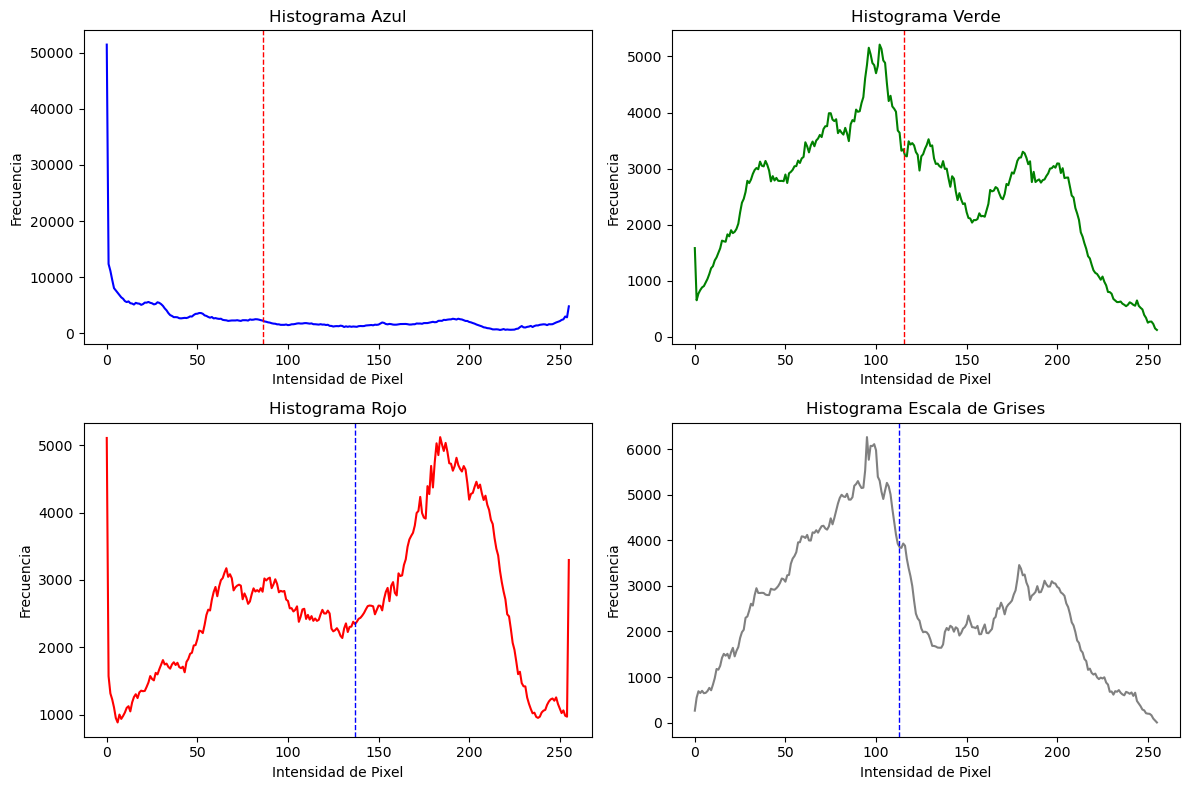

********************perro/perro_salida_gray_azul.jpg********************


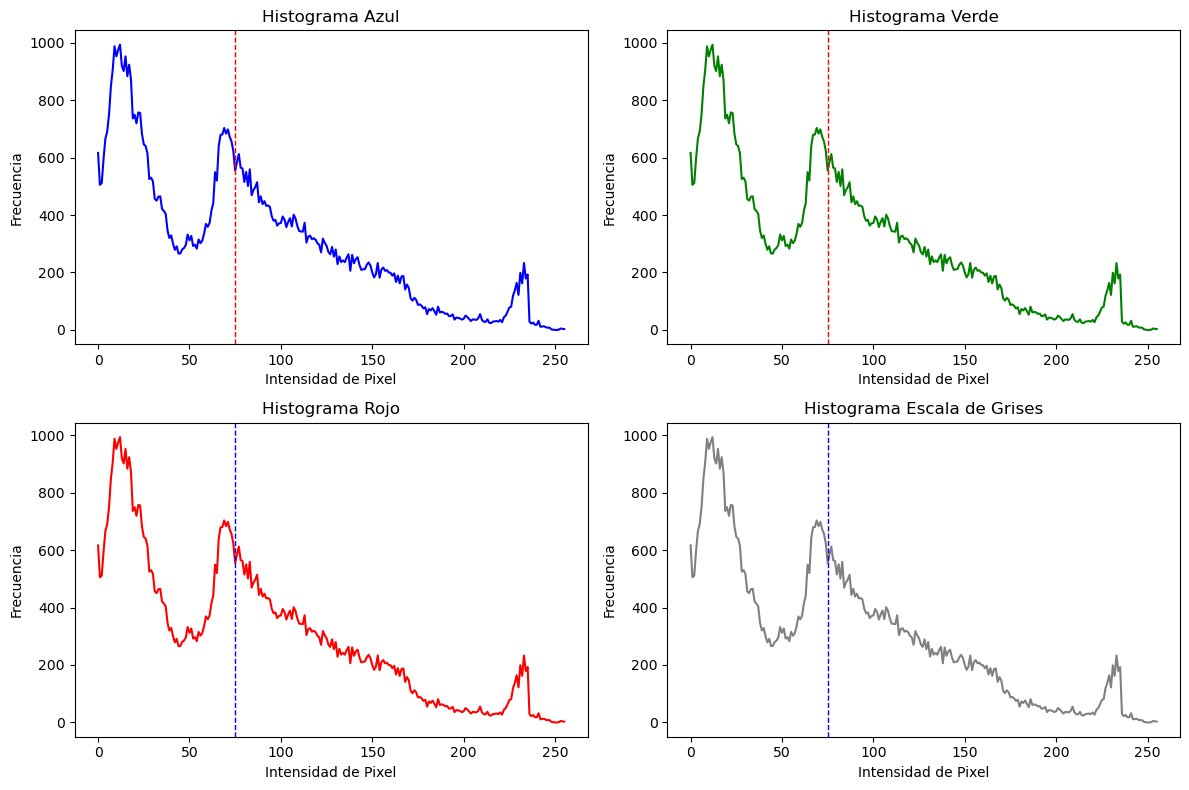

********************imagen1/imagen1_salida_gray_rojo.jpg********************


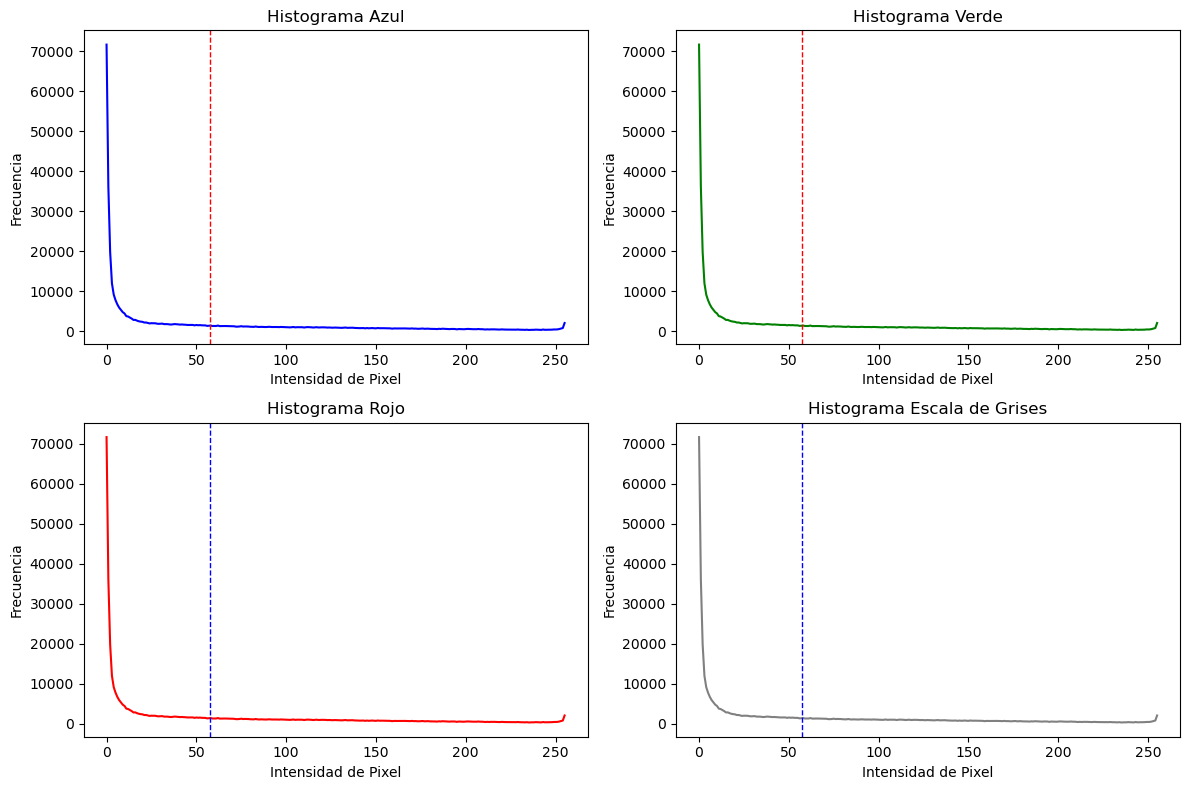

In [42]:
inputs = ["img.jpg", "perro/perro_salida_gray_azul.jpg", "imagen1/imagen1_salida_gray_rojo.jpg"]

for record in inputs:
    calcular_histograma(record)

# Problema 5:
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una solucion unica).

# El enfoque de escala de grises ponderada 
Se utiliza en el procesamiento de imágenes y la visión por computadora para convertir una imagen en color a escala de grises.  <br>
Esto resulta útil porque muchos algoritmos de procesamiento de imágenes funcionan de manera más eficiente con imágenes en escala de grises. La ponderación se basa en la respuesta del ojo humano a diferentes colores, siendo el verde el que más contribuye al brillo percibido, seguido del rojo y luego el azul.

In [46]:
def escala_grises_ponderada(imagen, tipo='Rec601'):
    imagen_color = cv2.imread(imagen)    
    azul, verde, rojo = cv2.split(imagen_color)
    
    if metodo == 'Rec601':
        gris_ponderada = 0.2989 * rojo + 0.5870 * verde + 0.1140 * azul
    elif metodo == 'Rec709':
        gris_ponderada = 0.2126 * rojo + 0.7152 * verde + 0.0722 * azul
    elif metodo == 'Rec2020':
        gris_ponderada = 0.2627 * rojo + 0.6780 * verde + 0.0593 * azul
    elif metodo == 'Luma':
        gris_ponderada = 0.299 * rojo + 0.587 * verde + 0.114 * azul
    elif metodo == 'Promedio':
        gris_ponderada = (rojo + verde + azul) / 3
    else:
        raise ValueError("Método de conversión no soportado")
        
    gris_ponderada = gris_ponderada.astype(np.uint8) 

    return gris_ponderada



In [47]:
imagen = 'img.jpg'
metodos = ['Rec601','Rec709','Rec2020','Luma','Promedio']

for metodo in metodos:    
    imagen_gris_ponderada = escala_grises_ponderada(imagen,metodo)
    cv2.imshow('Escala de Grises Ponderada', imagen_gris_ponderada)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Problema 6:
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook donde trabajo los demas ejercicios.

# Espacio de Color HSV (Hue, Saturation, Value)
Es un modelo de color que se utiliza ampliamente en gráficos por computadora, procesamiento de imágenes y visión por computadora debido a su capacidad para representar colores de manera más intuitiva en comparación con el espacio de color RGB (Red, Green, Blue).

### Componentes del Espacio de Color HSV
1. Hue (Tono):
    - Representa el color puro, sin tener en cuenta el brillo o la saturación.
    - Se mide en grados en un círculo cromático (0° a 360°). Por ejemplo: 
        - 0° es rojo
        - 120° es verde
        - 240° es azul
    - Los tonos intermedios se encuentran en los ángulos entre estos valores. 
    
    
2. Saturation (Saturación):
    - Representa la intensidad o pureza del color.
    - Se mide como un porcentaje (0% a 100%).
    - 0% significa que el color es un tono de gris, mientras que 100% significa un color completamente saturado, sin blanco añadido. 
    
    
3. Value (Valor o Brillo):
    - Representa el brillo del color.
    - También se mide como un porcentaje (0% a 100%).
    - 0% es negro, y 100% es el color más brillante posible.


### Mapeo de Colores al Espacio de Color HSV
Para mapear colores del espacio RGB al espacio HSV, se realizan las siguientes conversiones:

1. Normalización de valores RGB: <br>
Los valores de los canales R, G y B (normalmente en el rango de 0 a 255) se normalizan al rango [0, 1].

2. Cálculo del Valor (V):  <br>
𝑉 = max(𝑅,𝐺,𝐵)

3. Cálculo de la Saturación (S):  <br>
***Si 𝑉 = 0:*** <br>
S=0<br>
***Si 𝑉≠0:*** <br>
𝑆 = 𝑉 −min⁡(𝑅,𝐺,𝐵) / 𝑉

4. Cálculo del Tono (H): <br>
***Si 𝑅 = max⁡(𝑅,𝐺,𝐵):***<br>
𝐻=60×(0+(𝐺−𝐵)/(𝑉−min⁡(𝑅,𝐺,𝐵)))<br>
***Si 𝐺=max⁡(𝑅,𝐺,𝐵):***<br>
H=60×(2+ (B−R)/(V−min(R,G,B)))<br>
***Si B=max(R,G,B):*** <br>
H=60×(4+ (R−G)/(V−min(R,G,B)))<br>

Si el valor de H calculado es negativo, se suma 360 para obtener un ángulo positivo.

### Ejemplo de Conversión RGB a HSV
Supongamos que tenemos un color con los valores RGB (0, 255, 0) (verde puro):
1. Normalización:<br>
𝑅=0.0,𝐺=1.0,𝐵=0.0

2. Cálculo del Valor (V):<br>
V=max(0.0,1.0,0.0)=1.0

3. Cálculo de la Saturación (S): <br>
S= (1.0−min(0.0,1.0,0.0))/1.0  = 1.0-0.0/1.0 = 1.0

4. Cálculo del Tono (H): <br>
Dado que G=max(R,G,B): <br> 
H=60×(2 + (B−R)/(V−min(R,G,B))) <br>
H=60×(2 + (0.0−0.0)/ (1.0−0.0))  <br>
H=60×2=120.0

Por lo tanto, el color verde puro en el espacio RGB se mapea a HSV como (H=120°, S=100%, V=100%).

### Usos del Espacio de Color HSV
- Selección de color: HSV es más intuitivo para los usuarios al ajustar colores en aplicaciones gráficas y de diseño.
- Segmentación de color: HSV facilita la segmentación de colores en procesamiento de imágenes y visión por computadora, ya que los colores similares tienen valores de tono cercanos, independientemente de la iluminación.
- Detección de objetos: HSV se utiliza en algoritmos de visión por computadora para detectar objetos de colores específicos en imágenes y videos.